In [1]:
from matplotlib import pyplot as plt
from metpy import plots, calc
from metpy.units import units

import numpy as np
import matplotlib as mpl

import profile_io as io

In [2]:
def plot_skewT(profile1, profile2, profile3, title,
                fig=None,
                comp_pressure=None, comp_dewpoint=None,
                profile1_barb_skip=40, profile2_barb_skip=10,
                vert_dim='model_level_number', **kwargs):

    """
    Plot a skew T plot with optional profile.

    Arguments:
        - pressure: Atmospheric pressure [hPa].
        - temperature: Temperature [K].
        - dewpoint: Dewpoint [K]
        - wind_u: Wind u component [m s-1].
        - wind_v: Wind v component [m s-1].
        - title: Title for the plot.
        - wind_height: Height per wind level; required to calculate wind shear.
        - fig: Figure to use for the plot (default, create a new one).
        - figsize: The figure size (width, height).
        - **kwargs: Optional extra arguments to cape_func or to metpy.plots.SkewT.
    """

    # New blank skew T plot.
    skew = plots.SkewT(fig, subplot=121, **kwargs)

    # Plot environmental temperature.
    skew.plot(pressure = profile1['pres'], t = profile1['tmpc'], 
            color = 'r', linewidth = 1.2)
    skew.plot(pressure = profile2['pres'], t = profile2['tmpc'], 
            color = 'r', linewidth = 0.5)


    # Plot dewpoint.
    skew.plot(pressure = profile1['pres'], t = profile1['dwpc'],
            color = 'g', linewidth = 1.2)
    skew.plot(pressure = profile2['pres'], t = profile2['dwpc'],
            color = 'g', linewidth = 0.5)

    # Plot wind.
    skew.plot_barbs(pressure=profile1['pres'][::profile1_barb_skip],
                    u=profile1['wind_u'][::profile1_barb_skip],
                    v=profile1['wind_v'][::profile1_barb_skip],
                    xloc=0.80, y_clip_radius=0.01, linewidth = 1.2)

    skew.plot_barbs(pressure=profile2['pres'][::profile2_barb_skip],
                    u=profile2['wind_u'][::profile2_barb_skip],
                    v=profile2['wind_v'][::profile2_barb_skip],
                    xloc=0.92, y_clip_radius=0.01, linewidth = 0.5)                 

    # Add labels.
    plt.ylim(1000, 280)
    plt.xlim(-30, 40)
    plt.xlabel('Temperature ($^{\circ}$C)')
    plt.ylabel('Pressure (hPa)')
    plt.title(title)



/home/jsoderho/miniconda3/envs/metpy/lib/python3.11/site-packages/metpy/calc/thermo.py:1384: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/home/jsoderho/miniconda3/envs/metpy/lib/python3.11/site-packages/metpy/calc/thermo.py:1385: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


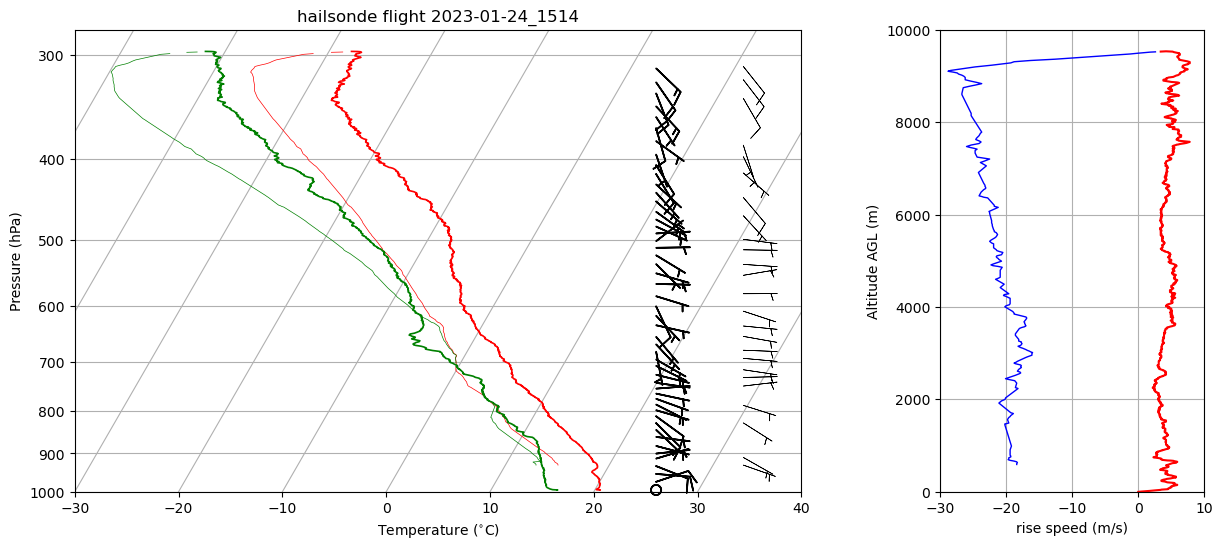

In [3]:
#read data
filename = 'test_data/hailsonde_2023-01-24_1514_8756.raw_flight_history.csv'
with_balloon_profile, no_balloon_profile, operational_profile, metadata = io.decode_raw_flight_history(filename, split=1998)

#create axis
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(15, 6))
a0.axis('off')

#plot skewT profiles
plot_skewT(with_balloon_profile, no_balloon_profile,
                'hailsonde flight 2023-01-24_1514',
                fig=f,
                vert_dim='altitude above MSL (m)')

#plot rise speed
a1.plot(with_balloon_profile['rise'], with_balloon_profile['hght'], color='r', linewidth=1.5)
a1.plot(no_balloon_profile['rise'], no_balloon_profile['hght'], color='b', linewidth=1)
a1.set_xlabel('rise speed (m/s)')
a1.set_ylabel('Altitude AGL (m)')
a1.grid()
a1.set_xlim((-30,10))
a1.set_ylim((0,10000))

plt.savefig(filename + '.png')